<a href="https://colab.research.google.com/github/Iamakhilvg/Machine-Learning/blob/main/ML_PROJECT_Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
df1=pd.read_csv('/content/drive/MyDrive/Data SET/Test Dataset.csv')
df2=pd.read_csv('/content/drive/MyDrive/Data SET/Training Dataset.csv')
df=pd.concat([df1, df2])


In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [ ]:
df['total_income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001015,Male,Yes,0,Graduate,No,110.0,360.0,1.0,Urban,NaN,5720.0
1,LP001022,Male,Yes,1,Graduate,No,126.0,360.0,1.0,Urban,NaN,4576.0
2,LP001031,Male,Yes,2,Graduate,No,208.0,360.0,1.0,Urban,NaN,6800.0
3,LP001035,Male,Yes,2,Graduate,No,100.0,360.0,NaN,Urban,NaN,4886.0
4,LP001051,Male,No,0,Not Graduate,No,78.0,360.0,1.0,Urban,NaN,3276.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [ ]:
df.corr()

,LoanAmount,Loan_Amount_Term,Credit_History,total_income
LoanAmount,1.000000,0.055636,-0.008235,0.601804
Loan_Amount_Term,0.055636,1.000000,-0.020439,-0.041587
Credit_History,-0.008235,-0.020439,1.000000,0.011632
total_income,0.601804,-0.041587,0.011632,1.000000


In [ ]:
sns.heatmap(L, annot=True, cmap='coolwarm')


NameError: ignored

In [ ]:
sns.heatmap(df.corr('Loan_Status'))


ValueError: ignored

In [ ]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,Male,Yes,0,Graduate,No,110.0,360.0,1.0,Urban,NaN,5720.0
1,Male,Yes,1,Graduate,No,126.0,360.0,1.0,Urban,NaN,4576.0
2,Male,Yes,2,Graduate,No,208.0,360.0,1.0,Urban,NaN,6800.0
3,Male,Yes,2,Graduate,No,100.0,360.0,NaN,Urban,NaN,4886.0
4,Male,No,0,Not Graduate,No,78.0,360.0,1.0,Urban,NaN,3276.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
#TO FILL THE MISSING VALUES IN THE RESPECTIVE COLOUMS USING MEAN AND MODE
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Status'].fillna(df['Loan_Status'].mode()[0],inplace=True)


In [ ]:
df.isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
total_income        0
dtype: int64

In [ ]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
total_income        float64
dtype: object

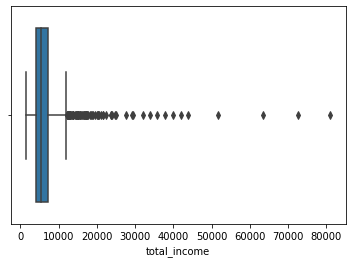

In [ ]:
#TO REMOVE THE OUTLIERS IN THE DATA SET
import seaborn as sns
sns.boxplot('total_income',data=df)

In [ ]:
import numpy as np

# Calculate the first quartile (Q1) and third quartile (Q3) of the data
Q1=df.total_income.quantile(.25)#float between 0&1
Q3=df.total_income.quantile(.75)
Q1,Q3

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1


# Calculate the lower and upper bounds for outliers
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
lower_limit
upper_limit


12021.0

In [ ]:
IQR

3142.0

In [ ]:
#df3
df_yes_out=df[(df.total_income<lower_limit)&(df.total_income>upper_limit)]
df3=df_yes_out
df3


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income


In [ ]:
df_no_out=df[(df.total_income>lower_limit)&(df.total_income<upper_limit)]
df4=df_no_out
df4



,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,Male,Yes,0,Graduate,No,110.0,360.0,1.0,Urban,Y,5720.0
1,Male,Yes,1,Graduate,No,126.0,360.0,1.0,Urban,Y,4576.0
2,Male,Yes,2,Graduate,No,208.0,360.0,1.0,Urban,Y,6800.0
3,Male,Yes,2,Graduate,No,100.0,360.0,1.0,Urban,Y,4886.0
4,Male,No,0,Not Graduate,No,78.0,360.0,1.0,Urban,Y,3276.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [ ]:
#CAPPING
df['total_income']=np.where(df['total_income']>=upper_limit,upper_limit,np.where(df['total_income']<=lower_limit,lower_limit,df['total_income']))

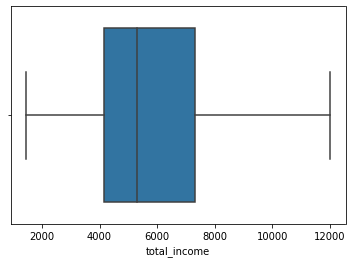

In [ ]:
sns.boxplot('total_income',data=df)

In [ ]:
#Used for transform non-numeric labels to numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [ ]:
df['LoanAmount'] = df['LoanAmount'].apply(float)

In [ ]:
df.dtypes

Gender                int64
Married               int64
Dependents            int64
Education             int64
Self_Employed         int64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int64
Loan_Status           int64
total_income        float64
dtype: object

In [ ]:
X=df.drop(['Loan_Status'],axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
0,1,1,0,0,0,110.0,360.0,1.0,2,5720.0
1,1,1,1,0,0,126.0,360.0,1.0,2,4576.0
2,1,1,2,0,0,208.0,360.0,1.0,2,6800.0
3,1,1,2,0,0,100.0,360.0,1.0,2,4886.0
4,1,0,0,1,0,78.0,360.0,1.0,2,3276.0
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.0,360.0,1.0,0,2900.0
610,1,1,3,0,0,40.0,180.0,1.0,0,4106.0
611,1,1,1,0,0,253.0,360.0,1.0,2,8312.0
612,1,1,2,0,0,187.0,360.0,1.0,2,7583.0


In [ ]:
y=df['Loan_Status']
y

0      1
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 981, dtype: int64

In [ ]:
df['Gender'].value_counts()

1    799
0    182
Name: Gender, dtype: int64

Number of People taken loan as per Gender
1    799
0    182
Name: Gender, dtype: int64


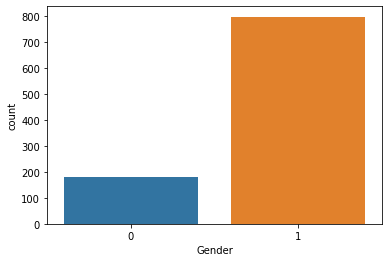

In [ ]:
print('Number of People taken loan as per Gender')
print(df['Gender'].value_counts())
sns.countplot(x="Gender",data=df)

Number of People taken loan as per Married
1    634
0    347
Name: Married, dtype: int64


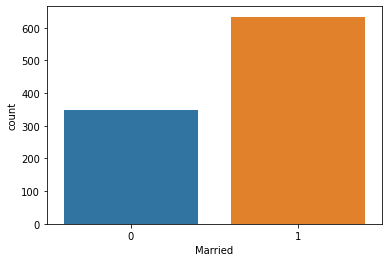

In [ ]:
print('Number of People taken loan as per Married')
print(df['Married'].value_counts())
sns.countplot(x="Married",data=df)

Number of People taken loan as per Dependents
0    570
1    160
2    160
3     91
Name: Dependents, dtype: int64


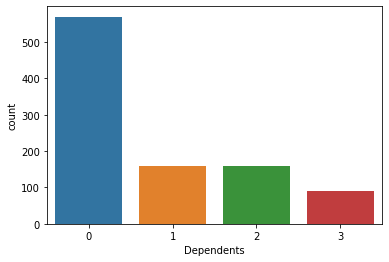

In [ ]:
print('Number of People taken loan as per Dependents')
print(df['Dependents'].value_counts())
sns.countplot(x="Dependents",data=df)

Number of People taken loan as per LoanAmount
120.00000    29
110.00000    27
142.51153    27
100.00000    24
187.00000    21
             ..
77.00000      1
390.00000     1
256.00000     1
265.00000     1
253.00000     1
Name: LoanAmount, Length: 233, dtype: int64


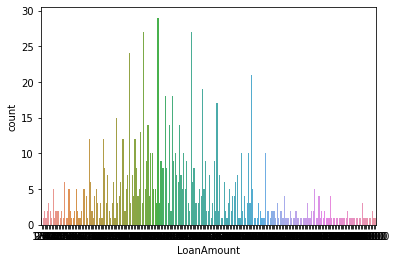

In [ ]:
print('Number of People taken loan as per LoanAmount')
print(df['LoanAmount'].value_counts())
sns.countplot(x="LoanAmount",data=df)

In [ ]:
df['LoanAmount'].value_counts()

120.00000    29
110.00000    27
142.51153    27
100.00000    24
187.00000    21
             ..
77.00000      1
390.00000     1
256.00000     1
265.00000     1
253.00000     1
Name: LoanAmount, Length: 233, dtype: int64

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,1,1,0,0,0,110.0,360.0,1.0,2,1,5720.0
1,1,1,1,0,0,126.0,360.0,1.0,2,1,4576.0
2,1,1,2,0,0,208.0,360.0,1.0,2,1,6800.0
3,1,1,2,0,0,100.0,360.0,1.0,2,1,4886.0
4,1,0,0,1,0,78.0,360.0,1.0,2,1,3276.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.0,360.0,1.0,0,1,2900.0
610,1,1,3,0,0,40.0,180.0,1.0,0,1,4106.0
611,1,1,1,0,0,253.0,360.0,1.0,2,1,8312.0
612,1,1,2,0,0,187.0,360.0,1.0,2,1,7583.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X)

array([[ 0.47726799,  0.73980985, -0.74513196, ...,  0.42151046,
         1.18242008, -0.11716618],
       [ 0.47726799,  0.73980985,  0.22561765, ...,  0.42151046,
         1.18242008, -0.54613374],
       [ 0.47726799,  0.73980985,  1.19636726, ...,  0.42151046,
         1.18242008,  0.28780319],
       ...,
       [ 0.47726799,  0.73980985,  0.22561765, ...,  0.42151046,
         1.18242008,  0.8547603 ],
       [ 0.47726799,  0.73980985,  1.19636726, ...,  0.42151046,
         1.18242008,  0.58140598],
       [-2.09525891, -1.35169869, -0.74513196, ..., -2.37242036,
        -0.06618498, -0.54350894]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

In [ ]:
#PCA
# from sklearn.decomposition import PCA
# pca=PCA(n_components=3)
# X_train_pca=pca.fit_transform(X_train)
# X_test_pca=pca.transform(X_test)

In [ ]:
#K-NEIGHBOURS
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

76.61016949152543


In [ ]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred1=nb.predict(X_test)
y_pred1
print(accuracy_score(y_test,y_pred1)*100)


82.71186440677965


In [ ]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
Mnb=MultinomialNB()
Mnb.fit(X_train,y_train)
y_pred9=Mnb.predict(X_test)
y_pred9
print(accuracy_score(y_test,y_pred9)*100)


69.15254237288136


In [ ]:
#sUPPORT VECTOR MECHANISM
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred2=svm.predict(X_test)
y_pred2
print(accuracy_score(y_test,y_pred2)*100)

78.64406779661017


In [ ]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
Dclf=DecisionTreeClassifier()
Dclf.fit(X_train,y_train)
y_pred3=Dclf.predict(X_test)
y_pred3
print(accuracy_score(y_test,y_pred3)*100)


74.91525423728814


In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
Rclf=RandomForestClassifier(n_estimators=550)
Rclf.fit(X_train,y_train)
y_pred4=Rclf.predict(X_test)
y_pred4
print(accuracy_score(y_test,y_pred4)*100)


80.33898305084746


In [ ]:
#LOGISTIC REGRESSSION
from sklearn.linear_model import LogisticRegression
lnr=LogisticRegression()
lnr.fit(X_train,y_train)
y_pred5=lnr.predict(X_test)
y_pred5
print(accuracy_score(y_test,y_pred5)*100)

80.0


In [ ]:
from sklearn.model_selection import GridSearchCV
knn1=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance']}
clf=GridSearchCV(knn1,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'n_neighbors': 9, 'weights': 'uniform'}


In [ ]:
knn2=KNeighborsClassifier(n_neighbors=9,weights='uniform')
knn2.fit(X_train,y_train)
y_pred6=knn2.predict(X_test)
print(accuracy_score(y_test,y_pred6)*100)

78.30508474576271


In [ ]:
# import xgboost as xgb

# # Load data
# data = ...

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# # Convert data into DMatrix format
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

# # Set hyperparameters
# params = {
#     'booster': 'gbtree',
#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',
#     'max_depth': 6,
#     'subsample': 0.7,
#     'colsample_bytree': 0.7,
#     'eta': 0.1,
#     'seed': 0
# }

# # Train the model
# bst = xgb.train(params, dtrain, num_boost_round=100)

# # Make predictions
# preds = bst.predict(dtest)

# # Evaluate the model
# accuracy = accuracy_score(y_test, [round(pred) for pred in preds])
# print('Accuracy: {:.2f}%'.format(accuracy * 100))


In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57        63
           1       0.88      0.91      0.89       232

    accuracy                           0.83       295
   macro avg       0.74      0.72      0.73       295
weighted avg       0.82      0.83      0.82       295



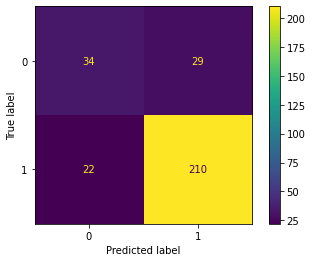

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

In [ ]:
nb.predict(sc.transform([['1','0','0','1','180','360','1','5','3','9999']]))

array([0])

In [ ]:
nb.predict(sc.transform([['1','1','0','0','0','110.0','360.0','1.0','2','5720.0']]))

array([1])

In [ ]:
import xgboost as xgb

# Load data
data = ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Convert data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters
params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'eta': 0.1,
    'seed': 0
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
preds = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, [round(pred) for pred in preds])
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Accuracy: 76.65%
